# Analysis of game success patterns

The Strimchik online store sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. It is necessary to identify patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.


### Data for analysis
The data for the study contains the following categories (columns):

- Name - the name of the game
- Platform - platform
- Year_of_Release - year of release
- Genre - game genre
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - сritics score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Data for 2016 may not be complete.


### Study plan
In the future work, we will adhere to the following plan:
1. Open data files and study general information
2. Data preparation
   - Replace column names (reduce to lower case);
   - Convert data to desired types.  Describe in which columns the data type was changed and why;
   - Process gaps if necessary:
     - Explain why they filled in the gaps in a certain way or why they did not do it;
     - Describe the reasons that could lead to omissions;
     - Pay attention to the 'tbd' abbreviation in the rating columns.  Separately parse this value and describe how to process it;
   - Calculate the total sales in all regions and record them in a separate column.
3. Exploratory data analysis
   - See how many games were released in different years.  Is data for all periods important?
   - See how sales have changed by platform.  Select platforms with the highest total sales and plot the distribution by year.  How long does it take for new platforms to appear and old ones to disappear?
   - Take the data for the corresponding current period.  Determine the current period independently as a result of the study of previous questions.  The main factor is that these data will help build a forecast for 2017.
   - Do not take into account data for previous years in the work.
   - Which platforms are leading in sales, growing or falling?  Select several potentially profitable platforms.
   - Plot a box-and-mustache plot of global game sales by platform.  Describe the result.
   - See how sales within one popular platform are affected by user and critic reviews.  Build a scatterplot and calculate the correlation between reviews and sales.  Formulate conclusions.
   - Correlate findings with sales of games on other platforms.
   - Look at the overall distribution of games by genre.  What about the most profitable genres?  Do genres with high and low sales stand out?
4. Portrait of the user of each region
   - Define for the user of each region (NA, EU, JP):
     - Most popular platforms (top 5).  Describe differences in sales shares.
     - The most popular genres (top 5).  Explain the difference.
     - Does the ESRB rating affect sales in a particular region?
5. Hypothesis testing
   - The average user ratings of the Xbox One and PC platforms are the same;
   - The average user ratings of the Action and Sports genres are different (alpha threshold value is set independently);
   - Explain:
     How were the null and alternative hypotheses formulated?
     - what criterion was used to test the hypotheses and why.
6. Write a general conclusion


### Research content
1. [Researching general information](#start)
2. [Data preparation](#preprocessing)
3. [Exploratory data analysis](#analysis)
4. [Portrait of user of each region](#portrait)
5. [Hypothesis testing](#hypothesis)
6. [General conclusion](#finish)

## Step 1. Researching general Information<a id="start"></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import math
from scipy.stats import levene
#games = pd.read_csv('games.csv')
games = pd.read_csv('/datasets/games.csv')

In [2]:
games.info()
games.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Conclusion

A first glance at the data reveals gaps in the columns, especially in the rating columns. It is also interesting that the database contains information about very different games, including old ones like Tetris or Duck Hunt. Let's start preparing the data.

## Step 2. Data preparation<a id="preprocessing"></a>

In [3]:
games.columns = games.columns.str.lower()

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In accordance with the assignment, the names of all columns were reduced to lower case.

In [5]:
games['year_of_release'] = games['year_of_release'].fillna(-1)

In [6]:
games['year_of_release'] = games['year_of_release'].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [7]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,-1,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [8]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


For the convenience of replacing data types, the gaps in the analyzed column were pre-filled with the stub value -1. After that, since the year can only take integer values, the data type in the year_of_release column was changed to int. Also, attention was drawn to the object type of the user_score column, which should only have numeric values. The reason is the indication in some cases instead of the rating of the value tbd. As clarified by searches in external sources in this case, the relationship to the rating tbd stands for "to be determined". This effectively means that there is no rating, and when converting the type of values in this column to numeric, the errors='coerce' parameter was used to force tbd to be replaced with an empty NaN value. Subsequently, these replaced values were treated as ordinary gaps in the data.

In [9]:
games.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
games.dropna(subset = ['name'], inplace = True)
games.reset_index(drop=True, inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


We proceed to analyze the gaps in each column. According to the general analysis of gaps in all columns, the reasons for their presence can be either technical errors when filling in, or incomplete or missing information at the time of their entry. The name column has 2 gaps with a small amount of data, which is not allowed to fill it correctly, and the old release year, which, given our main task of determining the actual release period of games for analysis, makes it inappropriate to fill in these values. These passes have been removed.

In [11]:
games.query('year_of_release == -1')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,-1,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,-1,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,-1,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,-1,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,-1,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,-1,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16403,Freaky Flyers,GC,-1,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,-1,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,-1,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
games = games.query('year_of_release != -1')
games.reset_index(drop=True, inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


There were 269 gaps found in the year_of_release column. Since these values have a primary influence on the determination of the actual release period of the game that is required of us, and also take into account that visually viewing games with missing values can be referred to as "old" and, accordingly, not relevant, it was decided to remove the lines with missing values in  year_of_release column.

In [13]:
games.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


The previously noted 2 gaps in the genre column were in the 2 deleted rows with gaps in name. We are no longer required to take any action on this column.

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


It was decided not to fill in the detected missing values in critic_score due to insufficient information for their correct filling in connection with their individuality for each specific game.

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


As in the case of critic_score, the user_score was not populated due to insufficient information for its correct implementation.

In [16]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
for i in range(len(games)):
    if games.loc[i, 'rating'] == 'K-A':
        games.loc[i, 'rating'] = 'E'
    elif games.loc[i, 'rating'] == 'RP':
        games.loc[i, 'rating'] = np.nan
    else:
        pass
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [18]:
games['rating'] = games['rating'].fillna('NR')
games['rating'].unique()

array(['E', 'NR', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

An analysis of existing ESRB ratings showed that the K-A rating indicated in the analyzed database is an outdated version of the E rating, and the RP rating means "rating pending", that is, in fact, there is no rating and should be indicated as NaN. In the future, to fill in NaN, but save information about the lack of a rating for the game, empty values were filled in as NR (no rating).

In [19]:
games['total_sales'] = (
    games['na_sales'] + 
    games['eu_sales'] + 
    games['jp_sales'] + 
    games['other_sales']
)
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NR,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NR,28.31


For further analysis, a total_sales column was added with the sum of sales in all regions.

## Step 3. Data analysis<a id="analysis"></a>

In [20]:
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

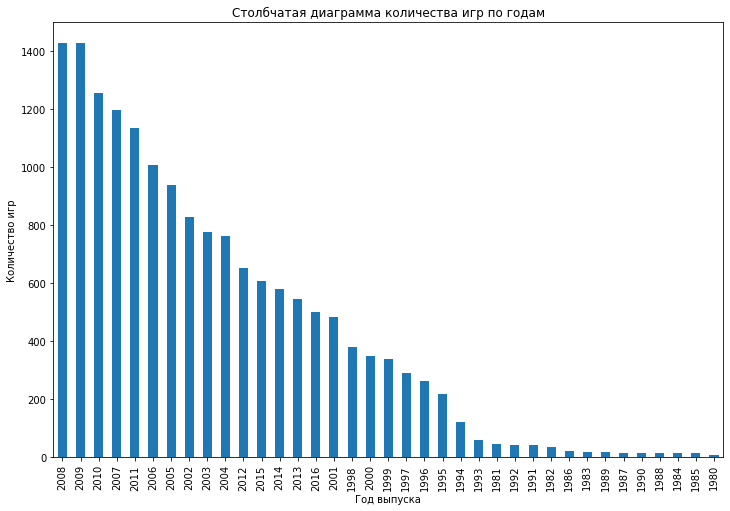

In [21]:
games['year_of_release'].value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Столбчатая диаграмма количества игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

An analysis of the number of games showed that their greatest number was concentrated in the period from 2007 to 2011, with a peak in 2008 and 2009.  On the other hand, it is noteworthy that until 2001 inclusive, the annual amount is relatively small, and this period can be classified as irrelevant for our analysis.

In [22]:
platform_total_sales = (
    games
    .groupby('platform')[['total_sales']].sum()
    .sort_values(by = 'total_sales', ascending=False)
)
platform_total_sales.reset_index(inplace = True)
platform_total_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [23]:
top_platform_total_sales = platform_total_sales.loc[0:5, 'platform'].tolist()
print('Список платформ с наибольшими суммарными продажами:', top_platform_total_sales)

Список платформ с наибольшими суммарными продажами: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


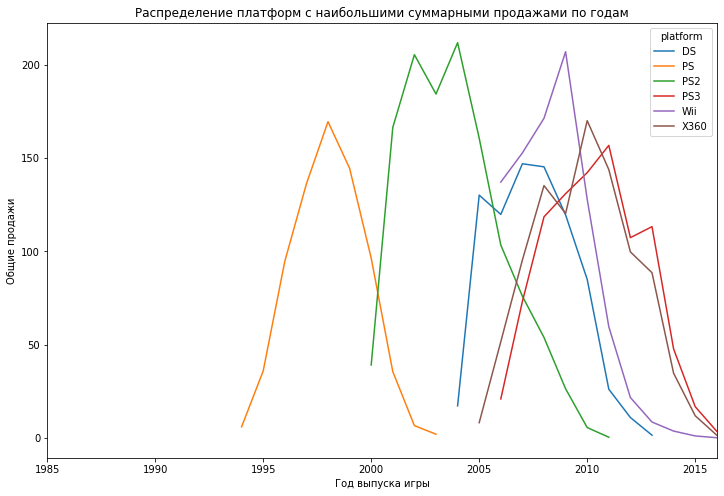

In [24]:
top_platform_per_year = (
    games
    .query('platform in @top_platform_total_sales')
    .pivot_table(index = 'year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')
)
top_platform_per_year.plot(figsize=(12, 8))
plt.title('Распределение платформ с наибольшими суммарными продажами по годам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Общие продажи')
plt.show()

To plot the distribution of platforms with the highest total sales by year, the data was first grouped by platform and total sales to identify platforms with the highest sales. According to the results of this grouping, the following top platforms were noted: PS2, X360, PS3, Wii, DS and PS. Further, the data was grouped only for the selected top platforms by the years of release of games. Based on this grouping, the graph shows that the average platform life is at the level of about 10 years. At the same time, if we analyze the lifespan of related Sony PlayStation platforms (PS, PS2 and PS3), it is noteworthy that the service life increases when moving to the next generation of the platform - PS has the shortest life, and PS3, in turn, is the longest and not even completed at the time of the analysis. This trend is likely to be beneficial to the gaming platform manufacturer and is being actively implemented by them to obtain maximum benefits over a longer period of time.

In [25]:
games_10 = games.query('year_of_release >= 2007')
games_10.reset_index(drop = True, inplace = True)

In [26]:
games_10.info()
games_10.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9327 entries, 0 to 9326
Data columns (total 12 columns):
name               9327 non-null object
platform           9327 non-null object
year_of_release    9327 non-null int64
genre              9327 non-null object
na_sales           9327 non-null float64
eu_sales           9327 non-null float64
jp_sales           9327 non-null float64
other_sales        9327 non-null float64
critic_score       4370 non-null float64
user_score         4403 non-null float64
rating             9327 non-null object
total_sales        9327 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 874.5+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
2,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
3,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
4,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
5,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
6,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
7,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
8,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NR,15.13
9,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


Based on the analysis above, an average platform life of 10 years was visually noted. Considering this, as well as the fact that the largest number of games were concentrated in 2008 and 2009, 10 years were chosen as the relevant period for further analysis. The data for this period was stored in games_10.

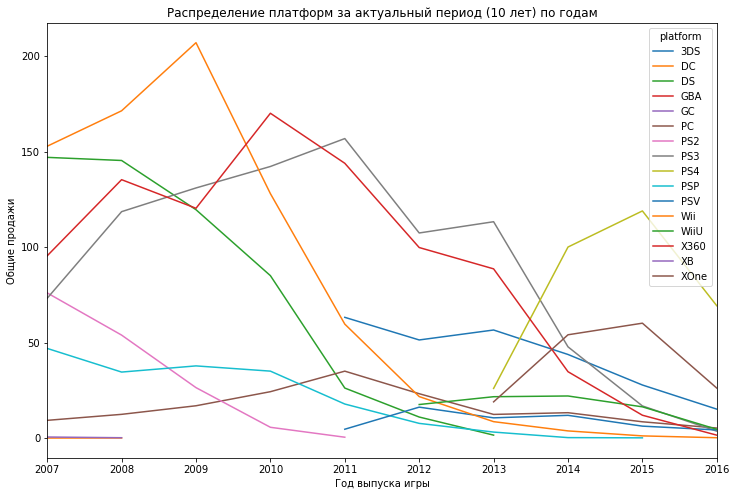

In [27]:
platform_per_year_10 = games_10.pivot_table(index = 'year_of_release', 
                                         columns='platform', 
                                         values = 'total_sales', 
                                         aggfunc='sum')
platform_per_year_10.plot(figsize=(12, 8))
plt.title('Распределение платформ за актуальный период (10 лет) по годам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Общие продажи')
plt.show()

In [28]:
top_platform_10 = ['PS4', 'XOne', '3DS']
print('Список платформ с наибольшими суммарными продажами на момент исследования (начало 2017 года):', 
      top_platform_10)

Список платформ с наибольшими суммарными продажами на момент исследования (начало 2017 года): ['PS4', 'XOne', '3DS']


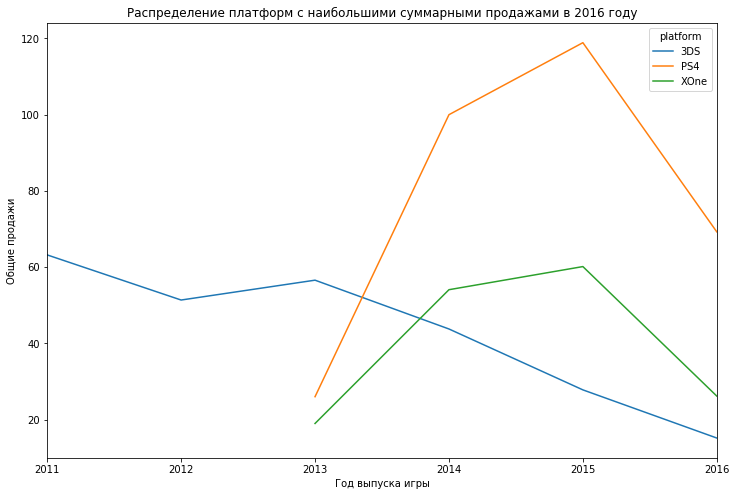

In [29]:
top_platform_per_year_10 = (
    games_10
    .query('platform in @top_platform_10')
    .pivot_table(index = 'year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')
)
top_platform_per_year_10.plot(figsize=(12, 8))
plt.title('Распределение платформ с наибольшими суммарными продажами в 2016 году')
plt.xlabel('Год выпуска игры')
plt.ylabel('Общие продажи')
plt.show()

A visual analysis of the distribution of platforms for the current period shows that at the time of preparation of this analysis (beginning of 2017), the entire market of platforms and, accordingly, games as a whole is in a declining stage, and this trend was also observed in the period from 2015 to 2016. The top sellers are Sony PlayStation 4 (PS4), Microsoft XBox One (XOne) and Nintendo 3DS (3DS) in descending order.

In [30]:
games_10_ps4 = games_10.query('platform == "PS4"')
games_10_xone = games_10.query('platform == "XOne"')
games_10_3ds = games_10.query('platform == "3DS"')

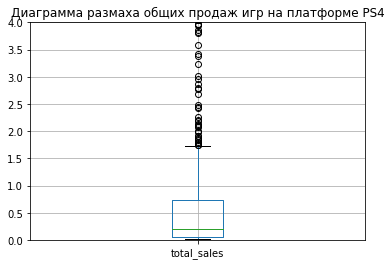

In [31]:
plt.ylim(0, 4)
games_10_ps4.boxplot(column='total_sales')
plt.title('Диаграмма размаха общих продаж игр на платформе PS4')
plt.show()

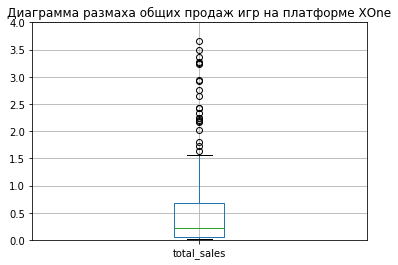

In [32]:
plt.ylim(0, 4)
games_10_xone.boxplot(column='total_sales')
plt.title('Диаграмма размаха общих продаж игр на платформе XOne')
plt.show()

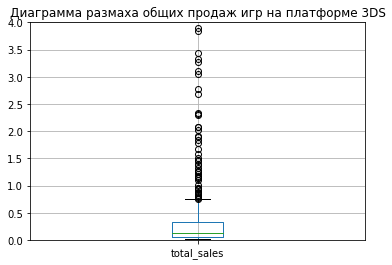

In [33]:
plt.ylim(0, 4)
games_10_3ds.boxplot(column='total_sales')
plt.title('Диаграмма размаха общих продаж игр на платформе 3DS')
plt.show()

The plotted range diagrams for the three leading platforms confirm the similarity of the PS4 and XOne distribution visually seen earlier on the graph, with a significant difference from the 3DS.

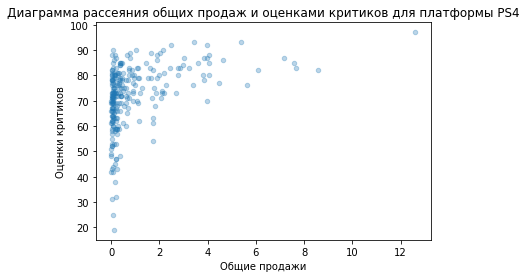

In [34]:
games_10_ps4.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3)
plt.title('Диаграмма рассеяния общих продаж и оценками критиков для платформы PS4')
plt.xlabel('Общие продажи')
plt.ylabel('Оценки критиков')
plt.show()

In [35]:
print('Коэффициент корреляции между общими продажами и оценками критиков для платформы PS4:',
      games_10_ps4['total_sales'].corr(games_10_ps4['critic_score']))

Коэффициент корреляции между общими продажами и оценками критиков для платформы PS4: 0.406567902061781


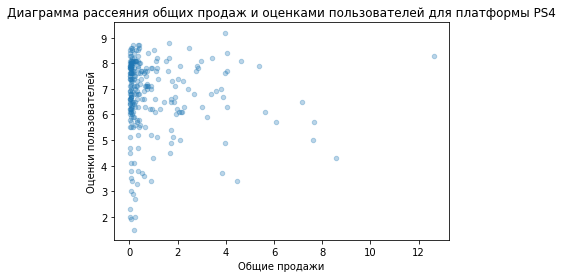

In [36]:
games_10_ps4.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3)
plt.title('Диаграмма рассеяния общих продаж и оценками пользователей для платформы PS4')
plt.xlabel('Общие продажи')
plt.ylabel('Оценки пользователей')
plt.show()

In [37]:
print('Коэффициент корреляции между общими продажами и оценками пользователей для платформы PS4:',
      games_10_ps4['total_sales'].corr(games_10_ps4['user_score']))

Коэффициент корреляции между общими продажами и оценками пользователей для платформы PS4: -0.031957110204556424


The analysis of the influence of critics and users ratings on sales showed their weak dependence. It is likely that sales are influenced not only by estimates, but also by a number of other factors. At the same time, it was noted that critics ratings, in comparison with user ratings, have a greater influence, and the impact of user ratings is generally close to zero.

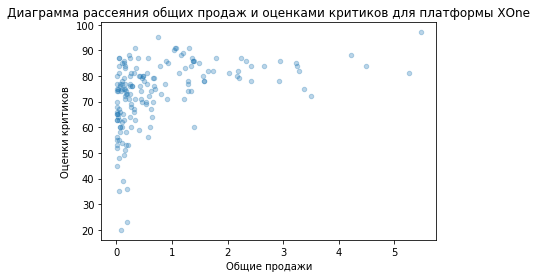

In [38]:
games_10_xone.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3)
plt.title('Диаграмма рассеяния общих продаж и оценками критиков для платформы XOne')
plt.xlabel('Общие продажи')
plt.ylabel('Оценки критиков')
plt.show()

In [39]:
print('Коэффициент корреляции между общими продажами и оценками критиков для платформы XOne:',
      games_10_xone['total_sales'].corr(games_10_xone['critic_score']))

Коэффициент корреляции между общими продажами и оценками критиков для платформы XOne: 0.41699832800840175


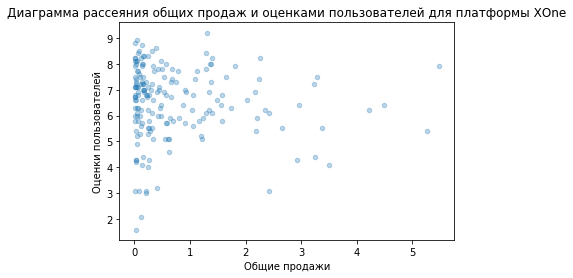

In [40]:
games_10_xone.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3)
plt.title('Диаграмма рассеяния общих продаж и оценками пользователей для платформы XOne')
plt.xlabel('Общие продажи')
plt.ylabel('Оценки пользователей')
plt.show()

In [41]:
print('Коэффициент корреляции между общими продажами и оценками пользователей для платформы XOne:',
      games_10_xone['total_sales'].corr(games_10_xone['user_score']))

Коэффициент корреляции между общими продажами и оценками пользователей для платформы XOne: -0.06892505328279412


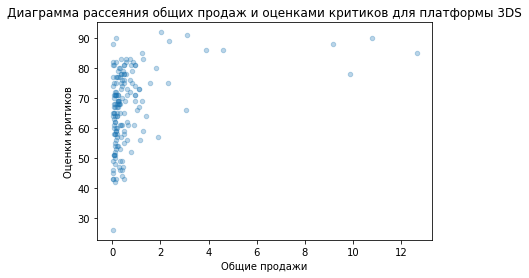

In [42]:
games_10_3ds.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3)
plt.title('Диаграмма рассеяния общих продаж и оценками критиков для платформы 3DS')
plt.xlabel('Общие продажи')
plt.ylabel('Оценки критиков')
plt.show()

In [43]:
print('Коэффициент корреляции между общими продажами и оценками критиков для платформы 3DS:',
      games_10_3ds['total_sales'].corr(games_10_3ds['critic_score']))

Коэффициент корреляции между общими продажами и оценками критиков для платформы 3DS: 0.34873973059848346


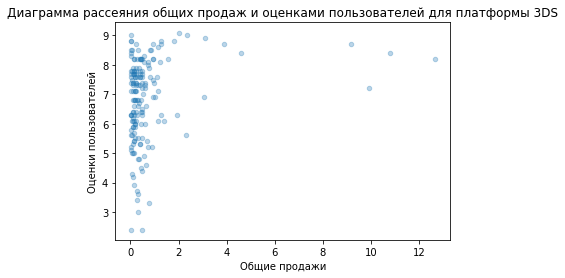

In [44]:
games_10_3ds.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3)
plt.title('Диаграмма рассеяния общих продаж и оценками пользователей для платформы 3DS')
plt.xlabel('Общие продажи')
plt.ylabel('Оценки пользователей')
plt.show()

In [45]:
print('Коэффициент корреляции между общими продажами и оценками пользователей для платформы 3DS:',
      games_10_3ds['total_sales'].corr(games_10_3ds['user_score']))

Коэффициент корреляции между общими продажами и оценками пользователей для платформы 3DS: 0.22207843643390884


The trend on the other two top platforms in terms of the influence of critic and user ratings has continued - the influence is weak, and the comparison is influenced by critic ratings more than user ratings.

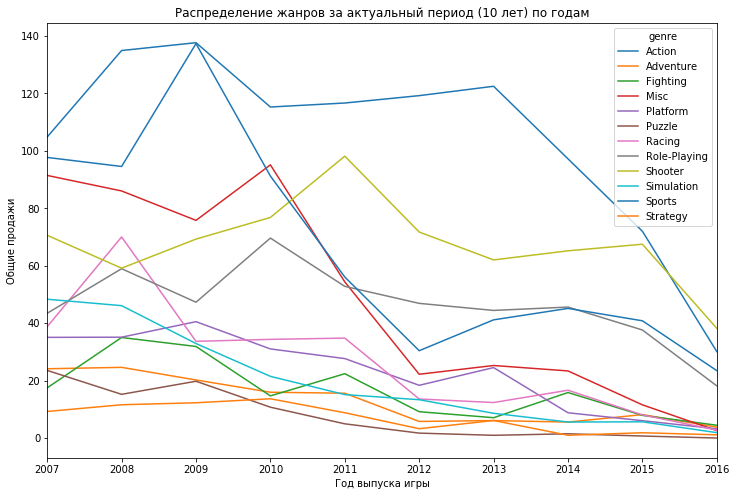

In [46]:
genre_per_year_10 = games_10.pivot_table(index = 'year_of_release', 
                                         columns='genre', 
                                         values = 'total_sales', 
                                         aggfunc='sum')
genre_per_year_10.plot(figsize=(12, 8))
plt.title('Распределение жанров за актуальный период (10 лет) по годам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Общие продажи')
plt.show()

In [47]:
genre_per_year_10

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2007,104.85,24.13,17.49,91.46,35.07,23.56,38.78,43.46,70.61,48.35,97.73,9.26
2008,134.96,24.63,35.02,86.06,35.13,15.23,70.04,58.98,59.16,46.11,94.58,11.60
2009,137.69,20.23,31.90,75.81,40.53,19.79,33.69,47.31,69.29,32.92,137.37,12.29
2010,115.29,15.96,14.69,95.14,31.04,10.75,34.37,69.65,76.83,21.49,91.24,13.68
2011,116.68,15.61,22.41,54.38,27.68,4.96,34.81,52.83,98.18,15.14,56.08,8.82
2012,119.25,5.79,9.18,22.22,18.37,1.72,13.61,46.91,71.75,13.36,30.42,3.26
2013,122.51,6.09,7.09,25.27,24.54,0.96,12.37,44.45,62.04,8.63,41.17,6.12
2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85


Based on the results of the analysis of the distribution of total sales by genre, a group of 4 leaders can be distinguished: shooter, action, sports and role-playing. In recent years, this group has clearly stood out above all others in terms of sales, which generally confirms the current picture of user preferences. During the current period, attention is drawn to the fall of the misc genre, which at the beginning was in high positions, but later fell to the level of a "low" group with visually indistinguishable sales in relation to other genres from this group. It is likely that games with the "misc, miscellaneous" genre have lost their relevance and gone into specific and relevant genres without including elements of several genres at once.

## Step 4. Portrait of user of each region<a id="portrait"></a>

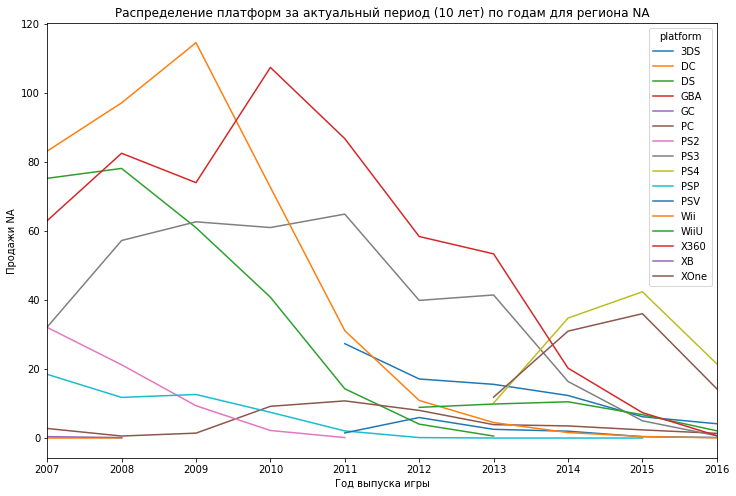

In [48]:
platform_per_year_10_na = games_10.pivot_table(index = 'year_of_release', 
                                         columns='platform', 
                                         values = 'na_sales', 
                                         aggfunc='sum')
platform_per_year_10_na.plot(figsize=(12, 8))
plt.title('Распределение платформ за актуальный период (10 лет) по годам для региона NA')
plt.xlabel('Год выпуска игры')
plt.ylabel('Продажи NA')
plt.show()

In [49]:
platform_per_year_10_na

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2007,NaN,0.0,75.25,2.45,0.21,2.77,32.05,32.16,NaN,18.46,NaN,83.14,NaN,62.99,0.41,NaN
2008,NaN,0.0,78.12,NaN,NaN,0.58,21.23,57.23,NaN,11.77,NaN,97.12,NaN,82.51,0.13,NaN
2009,NaN,NaN,60.95,NaN,NaN,1.42,9.36,62.65,NaN,12.62,NaN,114.55,NaN,74.00,NaN,NaN
2010,NaN,NaN,40.80,NaN,NaN,9.19,2.19,60.99,NaN,7.46,NaN,72.64,NaN,107.38,NaN,NaN
2011,27.34,NaN,14.27,NaN,NaN,10.76,0.13,64.88,NaN,2.06,1.49,31.11,NaN,86.75,NaN,NaN
2012,17.11,NaN,4.02,NaN,NaN,8.01,NaN,39.88,NaN,0.13,5.94,10.89,8.89,58.39,NaN,NaN
2013,15.56,NaN,0.57,NaN,NaN,3.88,NaN,41.45,10.13,0.00,2.52,4.48,9.85,53.36,NaN,11.85
2014,12.33,NaN,NaN,NaN,NaN,3.51,NaN,16.39,34.75,0.00,1.98,1.59,10.50,20.25,NaN,30.97
2015,6.17,NaN,NaN,NaN,NaN,2.36,NaN,4.99,42.37,0.00,0.39,0.43,6.76,7.36,NaN,36.03


In [50]:
top_platform_10_na = ['PS4', 'XOne', '3DS', 'WiiU', 'PC']
print('Список платформ с наибольшими суммарными продажами на момент исследования (начало 2017 года) в регионе NA:', 
      top_platform_10_na)

Список платформ с наибольшими суммарными продажами на момент исследования (начало 2017 года) в регионе NA: ['PS4', 'XOne', '3DS', 'WiiU', 'PC']


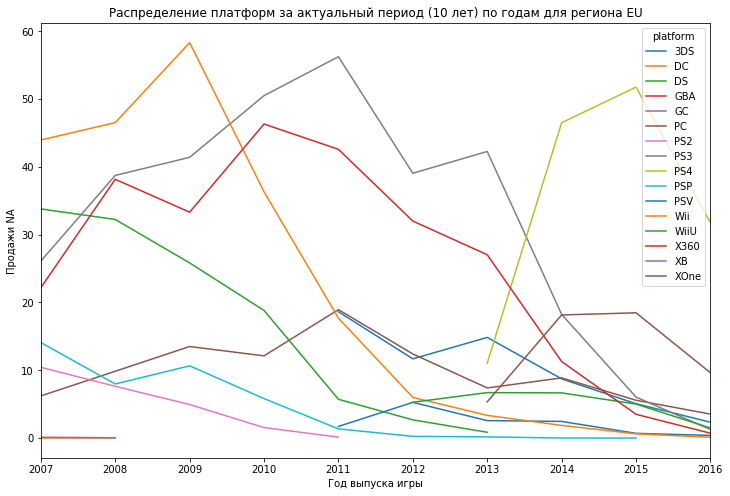

In [51]:
platform_per_year_10_eu = games_10.pivot_table(index = 'year_of_release', 
                                         columns='platform', 
                                         values = 'eu_sales', 
                                         aggfunc='sum')
platform_per_year_10_eu.plot(figsize=(12, 8))
plt.title('Распределение платформ за актуальный период (10 лет) по годам для региона EU')
plt.xlabel('Год выпуска игры')
plt.ylabel('Продажи NA')
plt.show()

In [52]:
platform_per_year_10_eu

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2007,NaN,0.0,33.79,0.9,0.06,6.21,10.43,26.10,NaN,14.08,NaN,43.96,NaN,22.17,0.12,NaN
2008,NaN,0.0,32.24,NaN,NaN,9.85,7.63,38.73,NaN,7.97,NaN,46.52,NaN,38.16,0.04,NaN
2009,NaN,NaN,25.83,NaN,NaN,13.50,4.94,41.40,NaN,10.65,NaN,58.31,NaN,33.31,NaN,NaN
2010,NaN,NaN,18.82,NaN,NaN,12.12,1.54,50.50,NaN,5.82,NaN,36.31,NaN,46.31,NaN,NaN
2011,18.63,NaN,5.71,NaN,NaN,18.94,0.13,56.24,NaN,1.35,1.71,17.68,NaN,42.58,NaN,NaN
2012,11.68,NaN,2.68,NaN,NaN,12.40,NaN,39.05,NaN,0.25,5.26,5.99,5.28,32.00,NaN,NaN
2013,14.84,NaN,0.85,NaN,NaN,7.39,NaN,42.27,11.05,0.17,2.57,3.34,6.70,27.03,NaN,5.34
2014,8.73,NaN,NaN,NaN,NaN,8.87,NaN,18.24,46.50,0.00,2.45,1.86,6.66,11.28,NaN,18.15
2015,5.06,NaN,NaN,NaN,NaN,5.57,NaN,6.04,51.76,0.00,0.69,0.62,5.01,3.50,NaN,18.47


In [53]:
top_platform_10_eu = ['PS4', 'XOne', 'PC', '3DS', 'WiiU']
print('Список платформ с наибольшими суммарными продажами на момент исследования (начало 2017 года) в регионе EU:', 
      top_platform_10_eu)

Список платформ с наибольшими суммарными продажами на момент исследования (начало 2017 года) в регионе EU: ['PS4', 'XOne', 'PC', '3DS', 'WiiU']


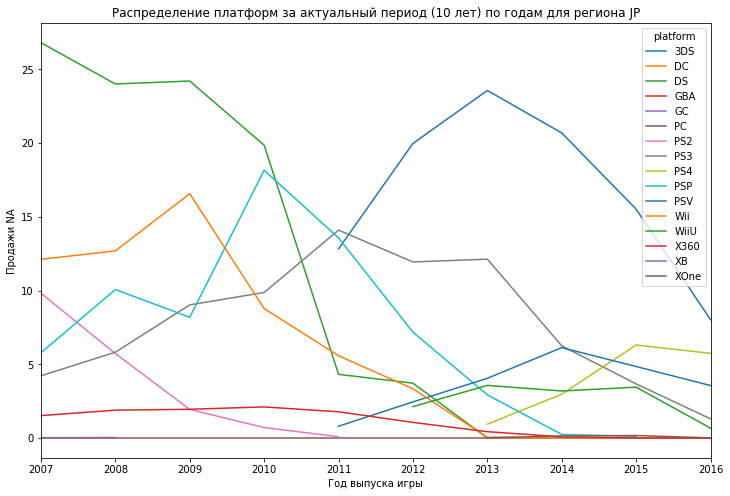

In [54]:
platform_per_year_10_jp = games_10.pivot_table(index = 'year_of_release', 
                                         columns='platform', 
                                         values = 'jp_sales', 
                                         aggfunc='sum')
platform_per_year_10_jp.plot(figsize=(12, 8))
plt.title('Распределение платформ за актуальный период (10 лет) по годам для региона JP')
plt.xlabel('Год выпуска игры')
plt.ylabel('Продажи NA')
plt.show()

In [55]:
platform_per_year_10_jp

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2007,NaN,0.02,26.81,0.0,0.0,0.0,9.82,4.22,NaN,5.78,NaN,12.12,NaN,1.52,0.0,NaN
2008,NaN,0.04,24.01,NaN,NaN,0.0,5.73,5.82,NaN,10.07,NaN,12.69,NaN,1.89,0.0,NaN
2009,NaN,NaN,24.21,NaN,NaN,0.0,1.94,9.03,NaN,8.19,NaN,16.57,NaN,1.95,NaN,NaN
2010,NaN,NaN,19.86,NaN,NaN,0.0,0.71,9.87,NaN,18.16,NaN,8.78,NaN,2.11,NaN,NaN
2011,12.83,NaN,4.32,NaN,NaN,0.0,0.09,14.10,NaN,13.57,0.80,5.58,NaN,1.78,NaN,NaN
2012,19.98,NaN,3.72,NaN,NaN,0.0,NaN,11.94,NaN,7.18,2.45,3.34,2.13,1.06,NaN,NaN
2013,23.57,NaN,0.00,NaN,NaN,0.0,NaN,12.13,0.94,2.93,4.05,0.05,3.57,0.43,NaN,0.02
2014,20.69,NaN,NaN,NaN,NaN,0.0,NaN,6.25,2.97,0.24,6.13,0.00,3.19,0.08,NaN,0.14
2015,15.52,NaN,NaN,NaN,NaN,0.0,NaN,3.67,6.31,0.12,4.85,0.00,3.45,0.00,NaN,0.17


In [56]:
top_platform_10_jp = ['3DS', 'PS4', 'PSV', 'PS3', 'WiiU']
print('Список платформ с наибольшими суммарными продажами на момент исследования (начало 2017 года) в регионе JP:', 
      top_platform_10_jp)

Список платформ с наибольшими суммарными продажами на момент исследования (начало 2017 года) в регионе JP: ['3DS', 'PS4', 'PSV', 'PS3', 'WiiU']


The analysis of the top 5 platforms for the user portrait of each region showed the presence of differences between them, sometimes significant. In the NA (North America) region, the top three world platform leaders were retained by PS4, XOne, 3DS, but already in the EU (Europe) the PC platform (personal computers) took third place instead of 3DS, and in JP (Japan) the trio has radically changed and represents 3DS, PS4, PSV (Sony PlayStation Vita). In general, the picture is emerging that in JP users prefer wearable gaming platforms (3DS and PSV), in NA the balance shifts towards stationary platforms, but not completely (3DS is present) in third place, and EU users completely prefer stationary solutions. This is probably due to the specifics of cultures and life in the regions, in particular, in JP, users spend a lot of time in transport and outside of housing, which is historically small in size and worse adapted to accommodate gaming platforms, unlike other regions.

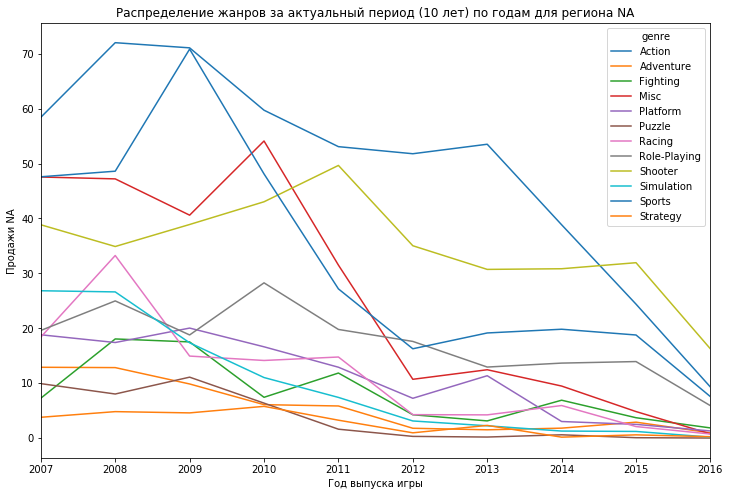

In [57]:
genre_per_year_10_na = games_10.pivot_table(index = 'year_of_release', 
                                         columns='genre', 
                                         values = 'na_sales', 
                                         aggfunc='sum')
genre_per_year_10_na.plot(figsize=(12, 8))
plt.title('Распределение жанров за актуальный период (10 лет) по годам для региона NA')
plt.xlabel('Год выпуска игры')
plt.ylabel('Продажи NA')
plt.show()

In [58]:
genre_per_year_10_na

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2007,58.43,12.89,7.26,47.55,18.81,9.91,18.39,19.60,38.85,26.83,47.59,3.78
2008,72.02,12.83,18.05,47.21,17.40,8.02,33.25,24.98,34.89,26.62,48.61,4.81
2009,71.08,9.85,17.51,40.60,20.03,11.09,14.93,18.78,38.90,17.35,70.85,4.58
2010,59.72,6.08,7.42,54.11,16.62,6.36,14.13,28.27,43.04,11.02,48.11,5.77
2011,53.08,5.84,11.84,31.50,12.90,1.61,14.76,19.78,49.66,7.40,27.17,3.25
2012,51.79,1.78,4.24,10.70,7.24,0.30,4.26,17.60,35.03,3.11,16.26,0.95
2013,53.52,1.50,3.12,12.44,11.35,0.18,4.22,12.93,30.72,2.23,19.14,2.30
2014,38.85,1.80,6.89,9.47,3.01,0.59,5.92,13.65,30.84,1.27,19.82,0.16
2015,24.39,2.89,3.70,4.82,2.49,0.06,2.09,13.93,31.94,1.20,18.77,0.58


In [59]:
top_genre_10_na = ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Fighting']
print('Список жанров с наибольшими суммарными продажами на момент исследования (начало 2017 года) в регионе NA:', 
      top_genre_10_na)

Список жанров с наибольшими суммарными продажами на момент исследования (начало 2017 года) в регионе NA: ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Fighting']


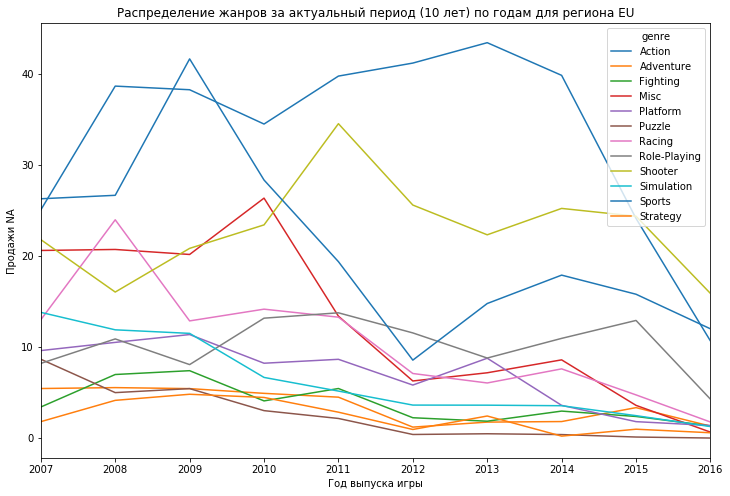

In [60]:
genre_per_year_10_eu = games_10.pivot_table(index = 'year_of_release', 
                                         columns='genre', 
                                         values = 'eu_sales', 
                                         aggfunc='sum')
genre_per_year_10_eu.plot(figsize=(12, 8))
plt.title('Распределение жанров за актуальный период (10 лет) по годам для региона EU')
plt.xlabel('Год выпуска игры')
plt.ylabel('Продажи NA')
plt.show()

In [61]:
genre_per_year_10_eu

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2007,25.08,5.45,3.42,20.62,9.62,8.67,13.01,8.21,21.81,13.82,26.30,1.81
2008,38.68,5.55,6.99,20.73,10.52,5.00,23.99,10.90,16.05,11.90,26.68,4.15
2009,38.28,5.44,7.41,20.18,11.38,5.44,12.88,8.08,20.85,11.51,41.67,4.82
2010,34.51,4.92,4.09,26.37,8.23,3.02,14.17,13.18,23.43,6.67,28.36,4.47
2011,39.78,4.50,5.45,13.40,8.66,2.16,13.29,13.77,34.55,5.17,19.39,2.85
2012,41.21,1.21,2.24,6.28,5.83,0.40,7.10,11.56,25.61,3.63,8.57,0.95
2013,43.45,1.76,1.86,7.18,8.78,0.48,6.06,8.80,22.34,3.62,14.79,2.43
2014,39.86,1.82,2.97,8.60,3.60,0.39,7.61,10.96,25.24,3.56,17.91,0.22
2015,24.14,3.35,2.38,3.60,1.81,0.12,4.75,12.93,24.38,2.47,15.81,0.98


In [62]:
top_genre_10_eu = ['Shooter', 'Sports', 'Action', 'Role-Playing', 'Racing']
print('Список жанров с наибольшими суммарными продажами на момент исследования (начало 2017 года) в регионе EU:', 
      top_genre_10_eu)

Список жанров с наибольшими суммарными продажами на момент исследования (начало 2017 года) в регионе EU: ['Shooter', 'Sports', 'Action', 'Role-Playing', 'Racing']


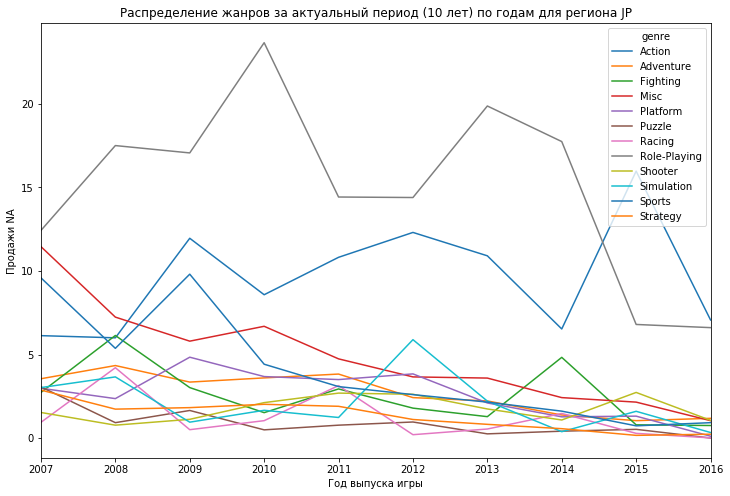

In [63]:
genre_per_year_10_jp = games_10.pivot_table(index = 'year_of_release', 
                                         columns='genre', 
                                         values = 'jp_sales', 
                                         aggfunc='sum')
genre_per_year_10_jp.plot(figsize=(12, 8))
plt.title('Распределение жанров за актуальный период (10 лет) по годам для региона JP')
plt.xlabel('Год выпуска игры')
plt.ylabel('Продажи NA')
plt.show()

In [64]:
genre_per_year_10_jp

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2007,6.13,3.55,2.73,11.46,2.98,3.06,0.94,12.43,1.53,3.02,9.59,2.87
2008,6.00,4.34,6.14,7.24,2.36,0.92,4.21,17.51,0.77,3.66,5.37,1.73
2009,11.96,3.35,3.02,5.80,4.84,1.65,0.50,17.07,1.12,0.95,9.81,1.82
2010,8.58,3.60,1.52,6.69,3.68,0.49,1.04,23.67,2.12,1.66,4.42,2.02
2011,10.82,3.83,2.94,4.74,3.50,0.77,3.14,14.43,2.69,1.23,3.08,1.90
2012,12.31,2.42,1.79,3.66,3.84,0.96,0.20,14.40,2.62,5.89,2.60,1.11
2013,10.91,2.22,1.28,3.59,2.10,0.25,0.54,19.88,1.74,2.21,2.15,0.82
2014,6.53,1.38,4.83,2.42,1.27,0.41,1.47,17.75,1.08,0.38,1.61,0.56
2015,15.98,1.04,0.79,2.15,1.31,0.52,0.28,6.80,2.73,1.60,0.73,0.16


In [65]:
top_genre_10_jp = ['Action', 'Role-Playing', 'Adventure', 'Shooter', 'Misc']
print('Список жанров с наибольшими суммарными продажами на момент исследования (начало 2017 года) в регионе JP:', 
      top_genre_10_jp)

Список жанров с наибольшими суммарными продажами на момент исследования (начало 2017 года) в регионе JP: ['Action', 'Role-Playing', 'Adventure', 'Shooter', 'Misc']


An analysis of the user portrait by genre confirms the previously discovered trend: NA and EU users are close to each other with small differences and close to the indicators for all users in general, while JP users clearly stand out for their differences, which probably come from differences in culture and interests of average users.

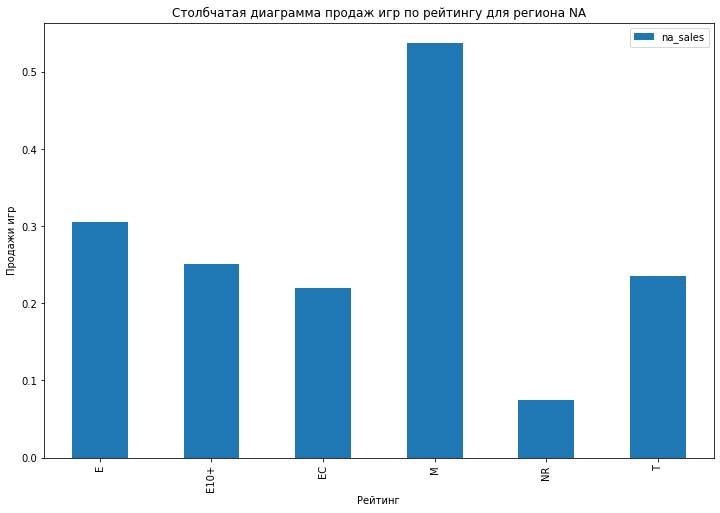

In [66]:
games_10.pivot_table(index='rating', values='na_sales').plot(kind='bar', figsize=(12, 8))
plt.title('Столбчатая диаграмма продаж игр по рейтингу для региона NA')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи игр')
plt.show()

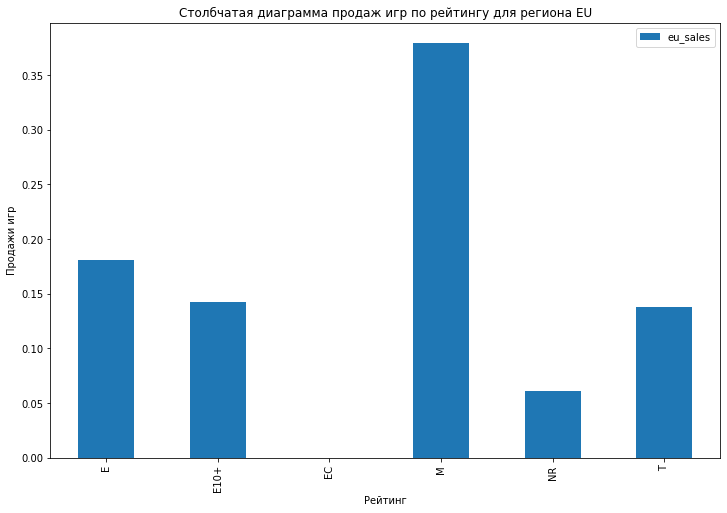

In [67]:
games_10.pivot_table(index='rating', values='eu_sales').plot(kind='bar', figsize=(12, 8))
plt.title('Столбчатая диаграмма продаж игр по рейтингу для региона EU')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи игр')
plt.show()

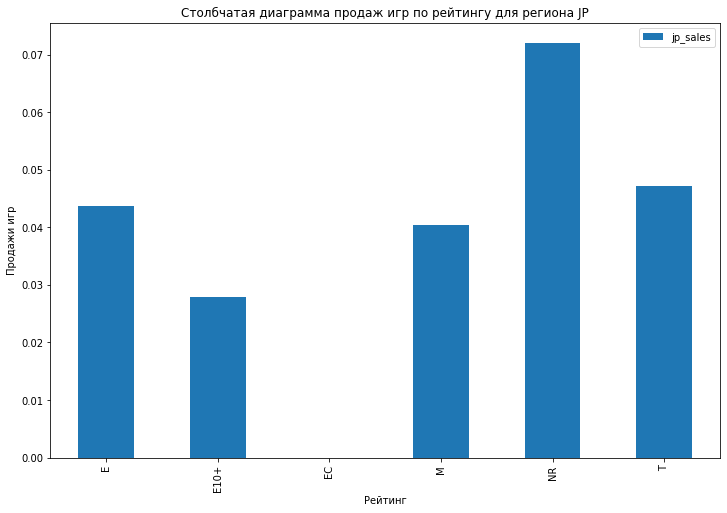

In [68]:
games_10.pivot_table(index='rating', values='jp_sales').plot(kind='bar', figsize=(12, 8))
plt.title('Столбчатая диаграмма продаж игр по рейтингу для региона JP')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи игр')
plt.show()

To analyze the impact of ESRB ratings, bar charts of sales by ESRB rating of games were built. Their analysis further emphasizes the uniqueness and identity of the JP market, as the charts for NA and EU are in many ways similar to the presence of games with an M (adult) rating, and in the JP region, the NR (unrated) rating we have already created excels. It is likely that this impact of unrated games on JP users is due to the release of a significant number of games intended only for this region or primarily for this region, which leads to the absence of the need for game developers to receive an ESRB rating, which is primarily intended for NA.

## Шаг 5. Проверка гипотез<a id="hypothesis"></a>

In [69]:
games_10_pc_user_score = games_10.query('platform == "PC"').copy()
games_10_pc_user_score.reset_index(drop=True, inplace=True)
games_10_pc_user_score.dropna(subset = ['user_score'], inplace = True)

In [70]:
games_10_xone_user_score = games_10.query('platform == "XOne"').copy()
games_10_xone_user_score.reset_index(drop=True, inplace=True)
games_10_xone_user_score.dropna(subset = ['user_score'], inplace = True)

In [71]:
stat, p1 = levene(games_10_xone_user_score['user_score'], games_10_pc_user_score['user_score'])
print('p-значение по методу Левене для проверки равенства дисперсий двух выборок:', p1)

p-значение по методу Левене для проверки равенства дисперсий двух выборок: 0.12087767238500854


In [72]:
alpha1 = .05

results1 = st.ttest_ind(
    games_10_xone_user_score['user_score'], 
    games_10_pc_user_score['user_score'],
    equal_var = True)

print('p-значение:', results1.pvalue)

if (results1.pvalue < alpha1):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.05554752084307562
Не получилось отвергнуть нулевую гипотезу


Missing values in the user_score columns were removed prior to analysis. The hypothesis "the average user ratings of the Xbox One and PC platforms are the same" was tested first. The null hypothesis in this case was formulated as "the average user ratings of the Xbox One and PC platforms are (same)", and the alternative - as "the average user ratings of the Xbox One and PC platforms are not equal". The level of statistical significance (alpha) was chosen at 5%. Additionally, the null hypothesis was tested about the equality of the variances of the two samples using the scipy.stats.levene method. This method was chosen visually established deviations from the normality of the analyzed samples. As a result, the value of p was not small enough to say that the equality of the variances could not be confirmed - the equal_var parameter was set to True. According to the results of the calculations, the null hypothesis was not rejected, which indicates that the originally formulated hypothesis "the average user ratings of the Xbox One and PC platforms are the same" turned out to be correct. The selected level of statistical significance turned out to be close, but less than the level of significance of the difference statistics (p-value).

In [73]:
games_10_action_user_score = games_10.query('genre == "Action"').copy()
games_10_action_user_score.reset_index(drop=True, inplace=True)
games_10_action_user_score.dropna(subset = ['user_score'], inplace = True)

In [74]:
games_10_sports_user_score = games_10.query('genre == "Sports"').copy()
games_10_sports_user_score.reset_index(drop=True, inplace=True)
games_10_sports_user_score.dropna(subset = ['user_score'], inplace = True)

In [75]:
stat, p1 = levene(games_10_action_user_score['user_score'], games_10_sports_user_score['user_score'])
print('p-значение по методу Левене для проверки равенства дисперсий двух выборок:', p1)

p-значение по методу Левене для проверки равенства дисперсий двух выборок: 1.63048164734554e-07


In [76]:
alpha1 = .05

results1 = st.ttest_ind(
    games_10_action_user_score['user_score'], 
    games_10_sports_user_score['user_score'],
    equal_var = False)

print('p-значение:', results1.pvalue)

if (results1.pvalue < alpha1):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.540665510055229e-11
Отвергаем нулевую гипотезу


Missing values in the user_score columns were removed prior to analysis. The hypothesis "average user ratings of the Action and Sports genres are different" was tested first. The null hypothesis in this case was formulated as "the average user ratings of the Action and Sports genres are equal", and the alternative - as "the average user ratings of the Action and Sports genres are not equal (different)". The level of statistical significance (alpha) was chosen at 5%. Additionally, the null hypothesis was tested about the equality of the variances of the two samples using the scipy.stats.levene method. This method was chosen visually established deviations from the normality of the analyzed samples. As a result, the value of p turned out to be very small, which indicates that the equality of the variances could not be confirmed - the equal_var parameter was set to False.  According to the results of the calculations, the null hypothesis was rejected, which indicates that the originally formulated hypothesis "the average user ratings of the Action and Sports genres are different" turned out to be correct. The selected level of statistical significance did not affect the results of the analysis, since the level of significance of the difference statistics (p-value) turned out to be very small, in fact tending to zero.

## Step 6. General conclusion<a id="finish"></a>

An analysis of historical data on game sales, user and expert ratings, genres and platforms obtained from open sources showed a general downward trend in game sales across all platforms and genres in all regions considered (North America NA, Europe EU and Japan JP) separately  and, accordingly, by 2017 as a whole. Although in the course of working with the data we noted the average life expectancy of platforms in the amount of 10 years (primarily on the example of various PlayStation platforms), the situation with declining sales even for the latest PlayStation 4 and XBox One platforms suggests that the interests  users are changing faster and the situation with the life of platforms is changing downward. In fact, there is a picture of expectation from the major players in the platform market (Sony, Microsoft and, to a lesser extent, Nintendo) for the next breakthrough in technology and the emergence of new more modern platforms and, accordingly, new games for these platforms, which can lead to a new increase in interest among users.

With such a negative outlook for 2017, in any case, the most profitable, based on sales, platforms and game genres remain. The market leaders were and probably will remain the PlayStation 4 and XBox One, as well as the Nintendo 3DS, which must be relied upon when planning advertising campaigns. Among the genres, in turn, we can single out the leading group from Shooter, Action, Sports and Role-Playing by a wide margin, the emphasis on which will allow us to wait for the next round of new developments and market growth.

Additional analysis of the impact of user ratings and critics' ratings, that they have little impact on sales, but still critics ratings can be taken into account and indicated when preparing marketing materials.

When analyzing the user profiles of the three main regions (NA, EU and JP), attention was drawn to the fact that, in general, users of NA and EU correspond to the general indicators. JP users stand out strongly against the background of other regions, which indicates that when planning an advertising campaign in this region, it is necessary to choose a special and unique approach only for it.